# Deep Learning for Image Classification

Welcome to deep learning for image classification tutorial!
**In this notebook, you will**:
- Learn the basics of PyTorch, a powerful but easy to use package for scientific computing (and deep learning)
- Learn how to build and train a convolutional neural network for image classification.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you know already how to use PyTorch, then you can directly go to the second part of this tutorial

## II. Training a classifier

In this part, we will train a Convolutional Neural Network to classify images of 10 different classes (dogs, cats, car, ...) and see how our model performs on the test set.

## III. Exploring CNN Architectures

This is the part where you get your hands dirty ;). Your mission is to experiment different CNN architectures and set hyperparameters in order to obtain the best accuracy on the test set!


In [0]:
%matplotlib inline

### Plotting functions and useful imports

Simply execute the cell below to define functions used later

In [0]:
# Python 2/3 compatibility
from __future__ import print_function, division

import itertools
import time


import numpy as np
import matplotlib.pyplot as plt

# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# I. What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


## PyTorch Basics

In the next steps, we will briefly see how to use PyTorch and exploits its power:

1. PyTorch Installation
2. PyTorch Tensors
3. Numpy Bridge
4. Automatic differentiation
5. PyTorch and GPU (CUDA support)


### 1. Install PyTorch and Torchvision



In [0]:
!pip install torch
!pip install torchvision

In [0]:
# Import torch and create the alias "th"
# instead of writing torch.name_of_a_method() , we only need to write th.name_of_a_method()
# (similarly to numpy imported as np)
import torch as th
import numpy as np
import time
import matplotlib.pyplot as plt

In [0]:
# Create tensor of ones (FloatTensor by default)
ones = th.ones(3, 2)
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### 2. PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

#### Tensor Shape
To know the shape of a given tensor, you can use the `.size()` method (the numpy equivalent is `.shape`)

In [0]:
# Display the shape of a tensor
# it can be used as a tuple
print("Tensor Shape: {}".format(ones.size()))

Tensor Shape: torch.Size([3, 2])


#### Reshape tensors

To reshape tensors (e.g. flatten a 3D tensor to a 1D array), you can use the `.view()` method:

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

[WARNING] when precising a new shape, you have to make sure that the number of elements is constant
For example, a 2D matrix of size 3x3 can only be viewed as a 1D array of size $3 \cdot 3 = 9$

In [0]:
# Create a 3D tensor of size 3x2x2
zeros_3d_tensor = th.zeros(3, 2, 2)
print("Original size:", zeros_3d_tensor.size())

# Reshape it to a 1D array of size 3*2*2 = 12
zeros_1d_array = zeros_3d_tensor.view(3 * 2 * 2)
print("Reshaped tensor:", zeros_1d_array.size())


# Let's view our original tensor as a 2D matrix
# If you want PyTorch to guess one remaining dimension
# you specify `-1` instead of the actual size
zeros_2d_matrix = zeros_3d_tensor.view(-1, 2 * 2)

print("Matrix shape:", zeros_2d_matrix.size())

Original size: torch.Size([3, 2, 2])
Reshaped tensor: torch.Size([12])
Matrix shape: torch.Size([3, 4])


#### Basic Operations on tensors

Tensor support all basic linear algebra operations. You can read the full documentation [here](http://pytorch.org/docs/master/tensors.html)

In [0]:
2 * ones + 1

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])

PyTorch tensors also supports numpy indexing:

In [0]:
print("\n Indexing Demo:")
print(ones[:, 1])


 Indexing Demo:
tensor([1., 1., 1.])


### 3. Numpy Bridge
WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common

Though, it is **easy with PyTorch to tranform Tensors to Numpy arrays and vice versa**

#### Numpy <-> PyTorch

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function

(here `th.from_numpy()` because we renamed *torch* as *th*)

To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [0]:
# np.float32 -> th.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

# the matrix is pass by reference:
# if we modify the original numpy array, the tensor is also edited
ones_tensor = th.from_numpy(ones_matrix)
# Convert back to a numpy matrix
numpy_matrix = ones_tensor.numpy()

print("PyTorch Tensor:")
print(ones_tensor)

print("Numpy Matrix:")
print(numpy_matrix)

PyTorch Tensor:
tensor([[1., 1.],
        [1., 1.]])
Numpy Matrix:
[[1. 1.]
 [1. 1.]]


### 4. Automatic Differentiation

Pytorch tensors allow to **automatically compute gradients**. That is particulary useful for backpropagation.

Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the gradient w.r.t. this variable using `.grad`.


In [0]:
# We need to specify that we want to compute the gradient
# as it requires extra memory and computation
ones_tensor = th.ones(2,2, requires_grad=True)

print(ones_tensor)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

In [0]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = th.ones(1, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

print(y)

tensor([7.], grad_fn=<AddBackward0>)


Let's backprop !

In [0]:
y.backward()

`x.grad` print gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [0]:
x.grad

tensor([2.])

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

### 5. PyTorch and GPU (CUDA support)

Google colab provides a CUDA enabled GPU, so we are going to use its power. 
You can move tensor to the GPU by simply using the `to()` method.
Otherwise, PyTorch will use the CPU.

Here, we will demonstrate the usefulness of the GPU on a simple matrix multiplication

In [0]:
if th.cuda.is_available():
  # Create tensors
  x = th.ones(1000, 1000)
  y = 2 * x + 3
  # Do the calculation on cpu (default)
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_cpu = time.time() - start_time
  
  # Do the same calculation but on the gpu
  # First move tensors to gpu
  x = x.to("cuda")
  y = y.to("cuda")
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_gpu = time.time() - start_time
  
  print("Time on CPU: {:.5f}s \t Time on GPU: {:.5f}s".format(time_cpu, time_gpu))
  print("Speed up: Computation was {:.0f}X faster on GPU!".format(time_cpu / time_gpu))
  
else:
  print("You need to enable GPU accelaration in colab (runtime->change runtime type)")

Time on CPU: 0.04185s 	 Time on GPU: 0.00053s
Speed up: Computation was 79X faster on GPU!


As expected, matrix multiplication is way faster on a GPU, so we'd better use it.


# II. Training a classifier


For this tutorial, we will use the CIFAR10 dataset.
There are 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


![CIFAR10](http://pytorch.org/tutorials/_images/cifar10.png)


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

Seed the random generator to have reproducible results:

In [0]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True
  th.cuda.manual_seed(seed)

# Define default device, we should use the GPU (cuda) if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")


### Define subset of the dataset (so it is faster to train)

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 20000 # Max: 50 000 - n_val_samples
n_val_samples = 5000
n_test_samples = 5000

train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]



In [0]:
num_workers = 2
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, sampler=test_sampler,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



In [0]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
#plt.imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

### 2. Define a Convolution Neural Network


In [0]:
# Useful imports
import torch.nn as nn
import torch.nn.functional as F

####  Forward propagation

In PyTorch, there are built-in functions that carry out the convolution steps for you.

- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

#### Simple Convolutional Neural Network

ConvNet with one convolution layer followed by a max pooling,
one fully connected layer and the output layer

In [0]:
class SimpleConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(SimpleConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # cf comments in forward() to have step by step comments
        # on the shape (how we pass from a 3x32x32 input image to a 18x16x16 volume)
        self.fc1 = nn.Linear(18 * 16 * 16, 64) 
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        # 18x16x16 -> 4608
        x = x.view(-1, 18 * 16 * 16)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        # The softmax non-linearity is applied later (cf createLossAndOptimizer() fn)
        x = self.fc2(x)
        return x

### 3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and ADAM (optionnaly SGD with momentum)



In [0]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

### 4. Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize



#### Data loader

In [0]:
def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=num_workers)

# Use larger batchsize for validation to speed up computation
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)

#### Training loop
The training script: it takes ~10s per epoch with batch_size = 32

In [0]:
def train(net, batch_size, n_epochs, learning_rate):
    """
    Train a neural network and print statistics of the training
    
    :param  net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()

            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
net = SimpleConvolutionalNetwork()

train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.05 took: 0.61s
Epoch 1, 20% 	 train_loss: 1.86 took: 0.56s
Epoch 1, 30% 	 train_loss: 1.79 took: 0.54s
Epoch 1, 40% 	 train_loss: 1.70 took: 0.54s
Epoch 1, 50% 	 train_loss: 1.63 took: 0.52s
Epoch 1, 60% 	 train_loss: 1.58 took: 0.53s
Epoch 1, 70% 	 train_loss: 1.51 took: 0.51s
Epoch 1, 80% 	 train_loss: 1.47 took: 0.54s
Epoch 1, 90% 	 train_loss: 1.47 took: 0.50s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.40 took: 0.63s
Epoch 2, 20% 	 train_loss: 1.41 took: 0.54s
Epoch 2, 30% 	 train_loss: 1.31 took: 0.54s
Epoch 2, 40% 	 train_loss: 1.32 took: 0.55s
Epoch 2, 50% 	 train_loss: 1.35 took: 0.58s
Epoch 2, 60% 	 train_loss: 1.30 took: 0.54s
Epoch 2, 70% 	 train_loss: 1.29 took: 0.54s
Epoch 2, 80% 	 train_loss: 1.23 took: 0.52s
Epoch 2, 90% 	 train_loss: 1.31 took: 0.51s
Validation loss = 1.29
Epoch 3, 10% 	 train_loss: 1.20 took: 0.60s
Epoch 3, 20% 	 train_loss: 1.16 took: 0.5

Now, let's look at the evolution of the losses

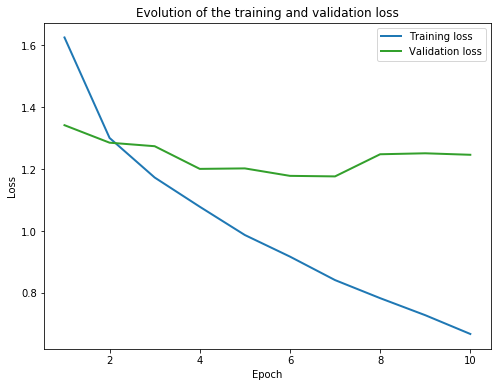

In [0]:
plot_losses(train_history, val_history)

### 5. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Ground truth:

       cat      plane        car       frog


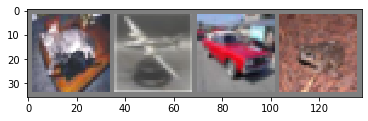

In [0]:
try:
  images, labels = next(iter(test_loader))
except EOFError:
  pass

# print images
imshow(torchvision.utils.make_grid(images))
print("Ground truth:\n")

print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.to(device))
print(outputs.size())

torch.Size([4, 10])


The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is from that particular class.
So, let's get the index of the highest energy:



Predicted:

      frog      plane        car       frog


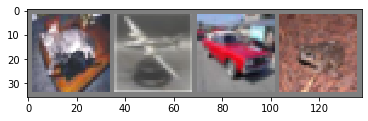

In [0]:
_, predicted = torch.max(outputs, 1)

print("Predicted:\n")
imshow(torchvision.utils.make_grid(images))

print(' '.join('{:>10}'.format(classes[predicted[j]]) for j in range(test_batch_size)))

The results seem pretty good.

Let us look at how the network performs on the whole test set.



In [0]:
def dataset_accuracy(net, data_loader, name=""):
    net = net.to(device)
    correct = 0
    total = 0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * float(correct) / total
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(total, name, accuracy))

def train_set_accuracy(net):
    dataset_accuracy(net, train_loader, "train")

def val_set_accuracy(net):
    dataset_accuracy(net, val_loader, "validation")  
    
def test_set_accuracy(net):
    dataset_accuracy(net, test_loader, "test")

def compute_accuracy(net):
    train_set_accuracy(net)
    val_set_accuracy(net)
    test_set_accuracy(net)
    
print("Computing accuracy...")
compute_accuracy(net)

Computing accuracy...
Accuracy of the network on the 20000 train images: 75.10 %
Accuracy of the network on the 5000 validation images: 59.62 %
Accuracy of the network on the 5000 test images: 59.56 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.
As a baseline, a linear model achieves around 30% accuracy.

What are the classes that performed well, and the classes that did
not perform well?



In [0]:
def accuracy_per_class(net):
    net = net.to(device)
    n_classes = 10
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in test_loader:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(test_batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix

confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        68.85   
car          74.06   
bird         48.63   
cat          39.03   
deer         58.38   
dog          46.72   
frog         69.65   
horse        63.43   
ship         66.67   
truck        60.23   


### Confusion Matrix

Let's look at what type of error our networks makes... 
It seems that our network is pretty good at classifying ships,
but has some difficulties to differentiate cats and dogs.
Also, it classifies a lot of trucks as cars.

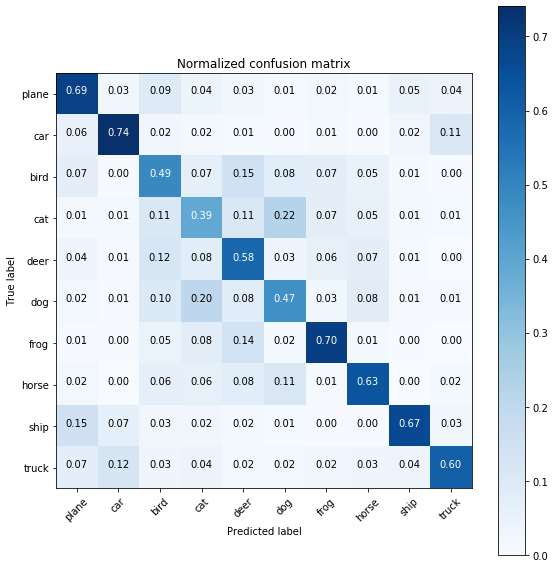

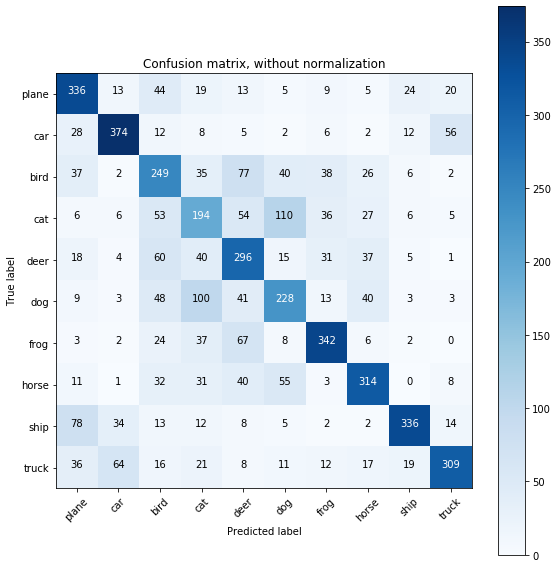

In [0]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

# III. Exploring CNN Architectures

Now, it is your turn to build a Convolutional Neural Network. The goal of this section is to explore different CNN architectures and setting hyperparameters in order to obtain the best accuracy on the test set!

The network that you have to tweak is called **MyConvolutionalNetwork**.

You can start changing the batch_size, number of epochs and then try adding more convolutional layers.

### PyTorch functions to build the network
- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the element-wise ReLU of Z1 (which can be of any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected (fc) layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

**Convolution Formulas**:

The formulas relating the output shape $(C_2, H_2, W_2)$ of the convolution to the input shape $(C_1, H_1, W_1)$ are:


$$ H_2 = \lfloor \frac{H_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ W_2 = \lfloor \frac{W_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ C_2 = \text{number of filters used in the convolution}$$

NOTE: $C_2 = C_1$ in the case of max pooling

where:
- $H_2$: height of the output volume  
- $W_2$: width of the output volume  
- $C_1$: in_channels, number of channels in the input volume
- $C_2$: out_channels

In [0]:
# All the imports needed for the assignment
%matplotlib inline

from __future__ import print_function, division

import itertools
import time


import numpy as np
import matplotlib.pyplot as plt

import torch as th
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

device = th.device("cuda" if th.cuda.is_available() else "cpu")

from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 20000 # Max: 50 000 - n_val_samples
n_val_samples = 5000
n_test_samples = 5000

train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

num_workers = 2
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, sampler=test_sampler,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def train(net, batch_size, n_epochs, learning_rate):
    """
    Train a neural network and print statistics of the training
    
    :param  net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()

            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=num_workers)

# Use larger batchsize for validation to speed up computation
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)

def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

def dataset_accuracy(net, data_loader, name=""):
    net = net.to(device)
    correct = 0
    total = 0
    for images, labels in data_loader:
        net.eval()
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * float(correct) / total
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(total, name, accuracy))

def train_set_accuracy(net):
    dataset_accuracy(net, train_loader, "train")

def val_set_accuracy(net):
    dataset_accuracy(net, val_loader, "validation")  
    
def test_set_accuracy(net):
    dataset_accuracy(net, test_loader, "test")

def compute_accuracy(net):
    train_set_accuracy(net)
    val_set_accuracy(net)
    test_set_accuracy(net)
    
def accuracy_per_class(net):
    net = net.to(device)
    n_classes = 10
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in test_loader:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(test_batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix


colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]


Files already downloaded and verified
Files already downloaded and verified


In [0]:
def get_output_size(in_size, kernel_size, stride=1, padding=0):
    """
    Get the output size given all the parameters of the convolution
    :param in_size: (int) input size
    :param kernel_size: (int)
    :param stride: (int)
    :param paddind: (int)
    :return: (int)
    """
    return int((in_size - kernel_size + 2 * padding) / stride) + 1

#### Example of use of helper method get_output_size() 

Let's assume you have an *input volume of size 3x32x32* (where 3 is the number of channels)
and you use a 2D convolution with the following parameters:

```python
conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
```
then, the size of the output volume is 18x?x? (because we have 18 filters) where ? is given by the convolution formulas (see above).

**get_output_size()** function allows to compute that size:

```
out_size = get_output_size(in_size=32, kernel_size=7, stride=2, padding=1)
print(out_size) # prints 14
```

That is to say, *the output volume is 18x14x14*

In [0]:
out_size = get_output_size(in_size=32, kernel_size=3, stride=1, padding=1)
print(out_size)

32


Below is the neural network you have to edit:

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        
        # Size of the output of the last convolution:
        self.flattened_size = 18 * 16 * 16
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=128, n_epochs=20, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 128
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.30 took: 0.42s
Epoch 1, 20% 	 train_loss: 2.07 took: 0.35s
Epoch 1, 30% 	 train_loss: 1.93 took: 0.29s
Epoch 1, 40% 	 train_loss: 1.88 took: 0.30s
Epoch 1, 50% 	 train_loss: 1.81 took: 0.32s
Epoch 1, 61% 	 train_loss: 1.79 took: 0.30s
Epoch 1, 71% 	 train_loss: 1.77 took: 0.33s
Epoch 1, 81% 	 train_loss: 1.72 took: 0.31s
Epoch 1, 91% 	 train_loss: 1.70 took: 0.31s
Validation loss = 1.49
Epoch 2, 10% 	 train_loss: 1.56 took: 0.39s
Epoch 2, 20% 	 train_loss: 1.54 took: 0.32s
Epoch 2, 30% 	 train_loss: 1.53 took: 0.32s
Epoch 2, 40% 	 train_loss: 1.52 took: 0.31s


KeyboardInterrupt: ignored

### Losses Plot

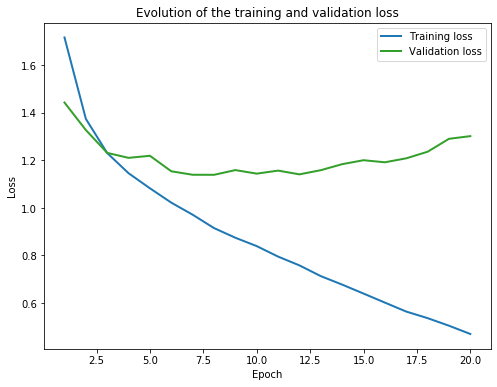

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 71.57 %
Accuracy of the network on the 5000 validation images: 60.74 %
Accuracy of the network on the 5000 test images: 60.34 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

NameError: ignored

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        
        # Size of the output of the last convolution:
        self.flattened_size = 18 * 16 * 16
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=8, n_epochs=20, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 8
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.03 took: 1.22s
Epoch 1, 20% 	 train_loss: 1.84 took: 1.09s
Epoch 1, 30% 	 train_loss: 1.72 took: 1.06s
Epoch 1, 40% 	 train_loss: 1.63 took: 1.08s
Epoch 1, 50% 	 train_loss: 1.58 took: 1.10s
Epoch 1, 60% 	 train_loss: 1.55 took: 1.09s
Epoch 1, 70% 	 train_loss: 1.46 took: 1.12s
Epoch 1, 80% 	 train_loss: 1.52 took: 1.15s
Epoch 1, 90% 	 train_loss: 1.47 took: 1.15s
Validation loss = 1.38
Epoch 2, 10% 	 train_loss: 1.36 took: 1.18s
Epoch 2, 20% 	 train_loss: 1.34 took: 1.08s
Epoch 2, 30% 	 train_loss: 1.29 took: 1.08s
Epoch 2, 40% 	 train_loss: 1.30 took: 1.11s
Epoch 2, 50% 	 train_loss: 1.34 took: 1.13s
Epoch 2, 60% 	 train_loss: 1.31 took: 1.15s
Epoch 2, 70% 	 train_loss: 1.32 took: 1.12s
Epoch 2, 80% 	 train_loss: 1.24 took: 1.12s
Epoch 2, 90% 	 train_loss: 1.27 took: 1.15s
Validation loss = 1.23
Epoch 3, 10% 	 train_loss: 1.18 took: 1.14s
Epoch 3, 20% 	 train_loss: 1.15 took: 1.14

### Losses Plot

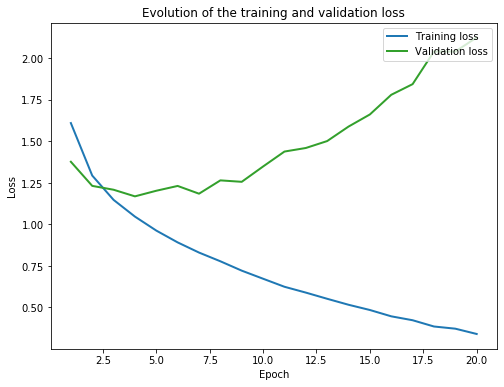

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 68.70 %
Accuracy of the network on the 5000 validation images: 59.36 %
Accuracy of the network on the 5000 test images: 60.06 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        64.75   
car          77.03   
bird         36.52   
cat          42.66   
deer         56.41   
dog          37.09   
frog         75.97   
horse        73.13   
ship         73.21   
truck        63.94   


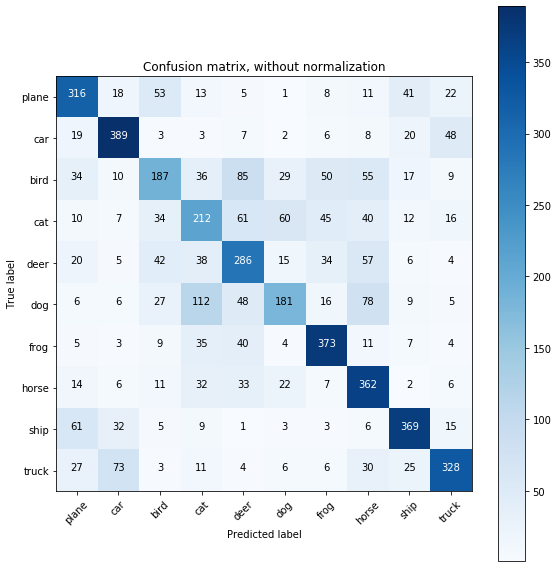

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        self.conv2 = nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)
        
        # Size of the output of the last convolution:
        self.flattened_size = 18 * 8 * 8
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=20, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.14 took: 0.69s
Epoch 1, 20% 	 train_loss: 1.96 took: 0.48s
Epoch 1, 30% 	 train_loss: 1.86 took: 0.48s
Epoch 1, 40% 	 train_loss: 1.73 took: 0.48s
Epoch 1, 50% 	 train_loss: 1.62 took: 0.52s
Epoch 1, 60% 	 train_loss: 1.58 took: 0.48s
Epoch 1, 70% 	 train_loss: 1.54 took: 0.51s
Epoch 1, 80% 	 train_loss: 1.57 took: 0.51s
Epoch 1, 90% 	 train_loss: 1.50 took: 0.53s
Validation loss = 1.38
Epoch 2, 10% 	 train_loss: 1.40 took: 0.55s
Epoch 2, 20% 	 train_loss: 1.43 took: 0.51s
Epoch 2, 30% 	 train_loss: 1.41 took: 0.47s
Epoch 2, 40% 	 train_loss: 1.35 took: 0.50s
Epoch 2, 50% 	 train_loss: 1.37 took: 0.48s
Epoch 2, 60% 	 train_loss: 1.30 took: 0.49s
Epoch 2, 70% 	 train_loss: 1.36 took: 0.48s
Epoch 2, 80% 	 train_loss: 1.34 took: 0.52s
Epoch 2, 90% 	 train_loss: 1.32 took: 0.50s
Validation loss = 1.28
Epoch 3, 10% 	 train_loss: 1.26 took: 0.53s
Epoch 3, 20% 	 train_loss: 1.27 took: 0.5

### Losses Plot

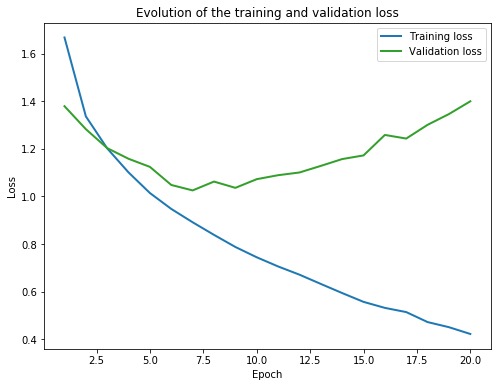

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 72.08 %
Accuracy of the network on the 5000 validation images: 63.58 %
Accuracy of the network on the 5000 test images: 63.84 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        69.06   
car          82.38   
bird         57.81   
cat          40.64   
deer         48.72   
dog          44.67   
frog         75.97   
horse        75.35   
ship         74.80   
truck        68.81   


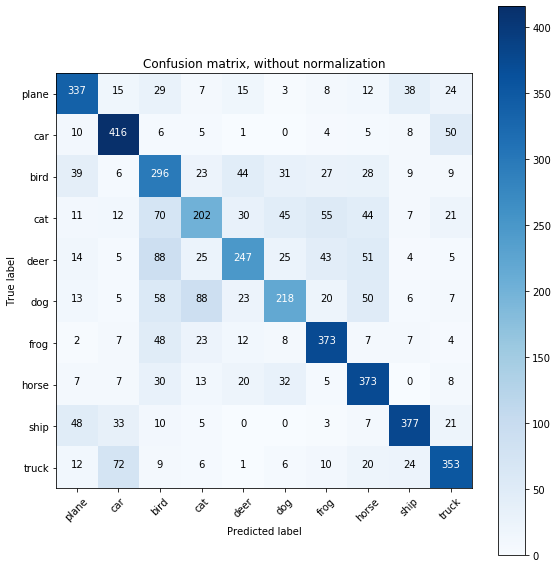

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv2 = nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)

        # Size of the output of the last convolution:
        self.flattened_size = 18 * 8 * 8
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool2(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=20, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.21 took: 0.61s
Epoch 1, 20% 	 train_loss: 1.95 took: 0.52s
Epoch 1, 30% 	 train_loss: 1.77 took: 0.58s
Epoch 1, 40% 	 train_loss: 1.70 took: 0.52s
Epoch 1, 50% 	 train_loss: 1.64 took: 0.51s
Epoch 1, 60% 	 train_loss: 1.58 took: 0.54s
Epoch 1, 70% 	 train_loss: 1.57 took: 0.53s
Epoch 1, 80% 	 train_loss: 1.50 took: 0.53s
Epoch 1, 90% 	 train_loss: 1.52 took: 0.53s
Validation loss = 1.40
Epoch 2, 10% 	 train_loss: 1.42 took: 0.59s
Epoch 2, 20% 	 train_loss: 1.42 took: 0.49s
Epoch 2, 30% 	 train_loss: 1.37 took: 0.52s
Epoch 2, 40% 	 train_loss: 1.39 took: 0.50s
Epoch 2, 50% 	 train_loss: 1.37 took: 0.52s
Epoch 2, 60% 	 train_loss: 1.35 took: 0.50s
Epoch 2, 70% 	 train_loss: 1.35 took: 0.53s
Epoch 2, 80% 	 train_loss: 1.36 took: 0.51s
Epoch 2, 90% 	 train_loss: 1.30 took: 0.53s
Validation loss = 1.26
Epoch 3, 10% 	 train_loss: 1.28 took: 0.60s
Epoch 3, 20% 	 train_loss: 1.24 took: 0.5

### Losses Plot

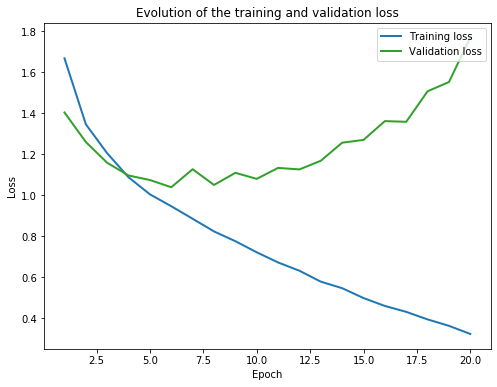

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 70.23 %
Accuracy of the network on the 5000 validation images: 62.76 %
Accuracy of the network on the 5000 test images: 62.86 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        66.19   
car          82.77   
bird         39.65   
cat          40.24   
deer         63.51   
dog          51.43   
frog         70.26   
horse        72.32   
ship         72.22   
truck        69.98   


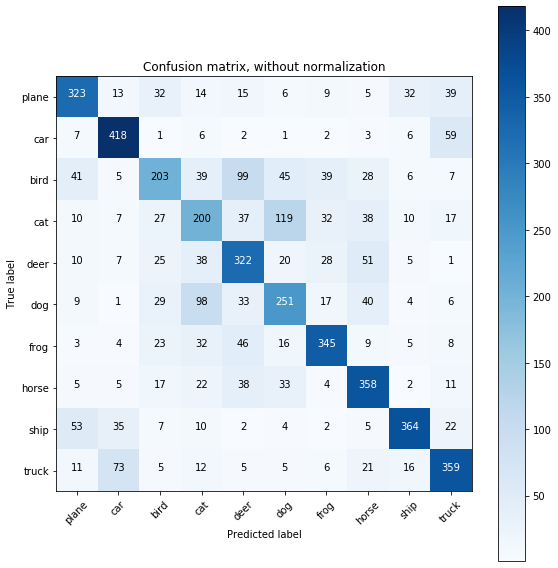

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv2 = nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)
        self.conv3 = nn.Conv2d(18, 8, kernel_size=3, stride=1, padding = 1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)

        # Size of the output of the last convolution:
        self.flattened_size = 8 * 4 * 4
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=40, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 40
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.28 took: 0.62s
Epoch 1, 20% 	 train_loss: 2.07 took: 0.54s
Epoch 1, 30% 	 train_loss: 1.96 took: 0.54s
Epoch 1, 40% 	 train_loss: 1.88 took: 0.60s
Epoch 1, 50% 	 train_loss: 1.80 took: 0.55s
Epoch 1, 60% 	 train_loss: 1.76 took: 0.56s
Epoch 1, 70% 	 train_loss: 1.70 took: 0.53s
Epoch 1, 80% 	 train_loss: 1.67 took: 0.57s
Epoch 1, 90% 	 train_loss: 1.69 took: 0.52s
Validation loss = 1.58
Epoch 2, 10% 	 train_loss: 1.57 took: 0.64s
Epoch 2, 20% 	 train_loss: 1.62 took: 0.56s
Epoch 2, 30% 	 train_loss: 1.60 took: 0.58s
Epoch 2, 40% 	 train_loss: 1.54 took: 0.54s
Epoch 2, 50% 	 train_loss: 1.56 took: 0.53s
Epoch 2, 60% 	 train_loss: 1.56 took: 0.56s
Epoch 2, 70% 	 train_loss: 1.52 took: 0.53s
Epoch 2, 80% 	 train_loss: 1.53 took: 0.59s
Epoch 2, 90% 	 train_loss: 1.48 took: 0.52s
Validation loss = 1.45
Epoch 3, 10% 	 train_loss: 1.49 took: 0.57s
Epoch 3, 20% 	 train_loss: 1.43 took: 0.5

### Losses Plot

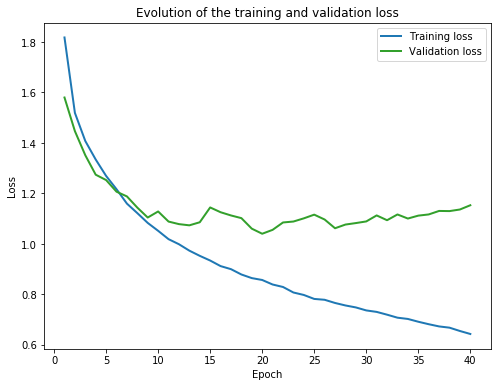

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 71.24 %
Accuracy of the network on the 5000 validation images: 62.66 %
Accuracy of the network on the 5000 test images: 63.12 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        73.57   
car          81.39   
bird         56.25   
cat          39.84   
deer         48.52   
dog          44.88   
frog         78.00   
horse        70.91   
ship         72.02   
truck        65.89   


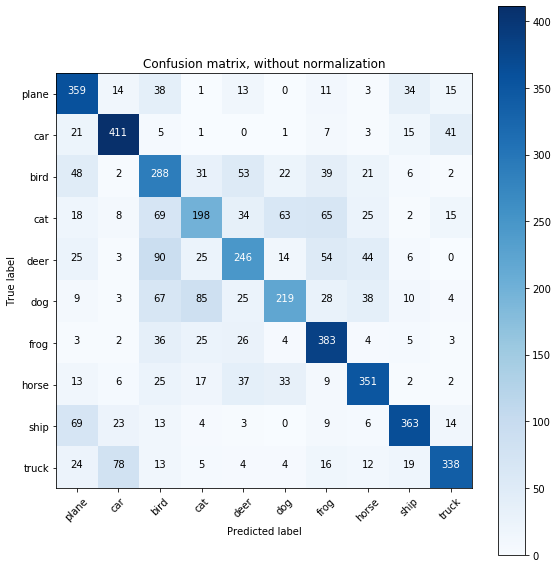

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv2 = nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)
        self.conv4 = nn.Conv2d(18, 8, kernel_size=3, stride=1, padding = 1)
        self.conv5 = nn.Conv2d(8, 8, kernel_size=3, stride=1, padding = 1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)

        # Size of the output of the last convolution:
        self.flattened_size = 8 * 4 * 4
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool2(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=40, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 40
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.30 took: 0.73s
Epoch 1, 20% 	 train_loss: 2.11 took: 0.65s
Epoch 1, 30% 	 train_loss: 2.01 took: 0.62s
Epoch 1, 40% 	 train_loss: 1.96 took: 0.61s
Epoch 1, 50% 	 train_loss: 1.88 took: 0.63s
Epoch 1, 60% 	 train_loss: 1.86 took: 0.63s
Epoch 1, 70% 	 train_loss: 1.81 took: 0.67s
Epoch 1, 80% 	 train_loss: 1.76 took: 0.62s
Epoch 1, 90% 	 train_loss: 1.73 took: 0.63s
Validation loss = 1.61
Epoch 2, 10% 	 train_loss: 1.67 took: 0.66s
Epoch 2, 20% 	 train_loss: 1.61 took: 0.63s
Epoch 2, 30% 	 train_loss: 1.66 took: 0.62s
Epoch 2, 40% 	 train_loss: 1.65 took: 0.67s
Epoch 2, 50% 	 train_loss: 1.59 took: 0.62s
Epoch 2, 60% 	 train_loss: 1.60 took: 0.61s
Epoch 2, 70% 	 train_loss: 1.50 took: 0.67s
Epoch 2, 80% 	 train_loss: 1.56 took: 0.62s
Epoch 2, 90% 	 train_loss: 1.55 took: 0.61s
Validation loss = 1.46
Epoch 3, 10% 	 train_loss: 1.46 took: 0.72s
Epoch 3, 20% 	 train_loss: 1.48 took: 0.6

### Losses Plot

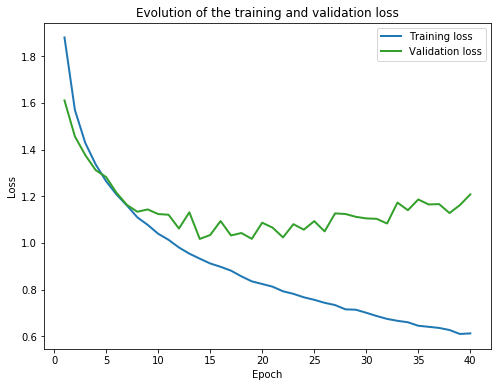

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 68.57 %
Accuracy of the network on the 5000 validation images: 63.12 %
Accuracy of the network on the 5000 test images: 63.58 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        70.70   
car          77.82   
bird         38.28   
cat          44.47   
deer         58.19   
dog          53.48   
frog         74.95   
horse        70.71   
ship         77.98   
truck        69.59   


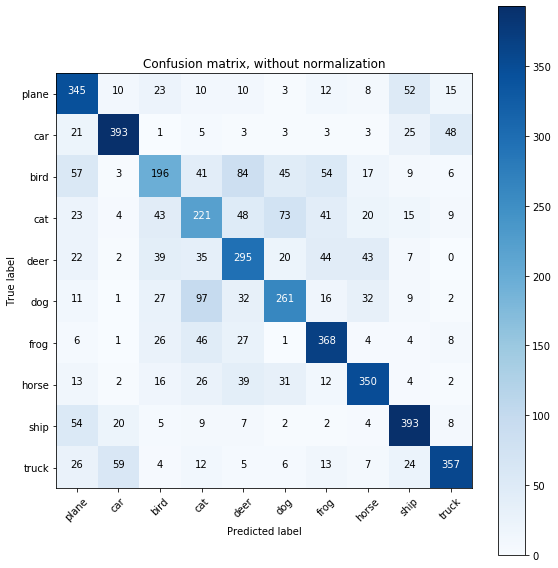

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv2 = nn.Conv2d(18, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)
        self.dropout1 = nn.Dropout2d(0.25)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding = 1)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding = 1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)
        self.dropout2 = nn.Dropout2d(0.25)
        self.conv6 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding = 1)
        self.conv7 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding = 1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0)
        self.dropout3 = nn.Dropout2d(0.25)

        # Size of the output of the last convolution:
        self.flattened_size = 128 * 2 * 2
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool2(x)
        x = self.dropout1(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)
        x = self.dropout2(x)
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = self.pool4(x)
        x = self.dropout2(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=128, n_epochs=40, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 128
n_epochs= 40
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.46 took: 0.50s
Epoch 1, 20% 	 train_loss: 2.43 took: 0.37s
Epoch 1, 30% 	 train_loss: 2.36 took: 0.36s
Epoch 1, 40% 	 train_loss: 2.27 took: 0.37s
Epoch 1, 50% 	 train_loss: 2.19 took: 0.38s
Epoch 1, 61% 	 train_loss: 2.11 took: 0.34s
Epoch 1, 71% 	 train_loss: 2.06 took: 0.36s
Epoch 1, 81% 	 train_loss: 2.04 took: 0.37s
Epoch 1, 91% 	 train_loss: 2.05 took: 0.41s
Validation loss = 1.78
Epoch 2, 10% 	 train_loss: 1.94 took: 0.47s
Epoch 2, 20% 	 train_loss: 1.96 took: 0.36s
Epoch 2, 30% 	 train_loss: 1.90 took: 0.35s
Epoch 2, 40% 	 train_loss: 1.86 took: 0.38s
Epoch 2, 50% 	 train_loss: 1.84 took: 0.35s
Epoch 2, 61% 	 train_loss: 1.79 took: 0.34s
Epoch 2, 71% 	 train_loss: 1.81 took: 0.35s
Epoch 2, 81% 	 train_loss: 1.79 took: 0.46s
Epoch 2, 91% 	 train_loss: 1.74 took: 0.35s
Validation loss = 1.68
Epoch 3, 10% 	 train_loss: 1.77 took: 0.46s
Epoch 3, 20% 	 train_loss: 1.71 took: 0.

### Losses Plot

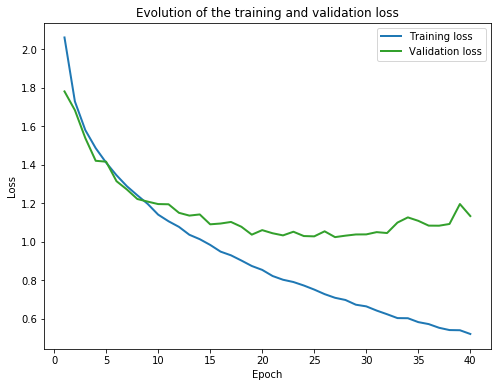

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 82.95 %
Accuracy of the network on the 5000 validation images: 69.18 %
Accuracy of the network on the 5000 test images: 68.84 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        70.49   
car          87.52   
bird         46.68   
cat          54.33   
deer         58.78   
dog          60.04   
frog         71.49   
horse        76.77   
ship         84.13   
truck        78.17   


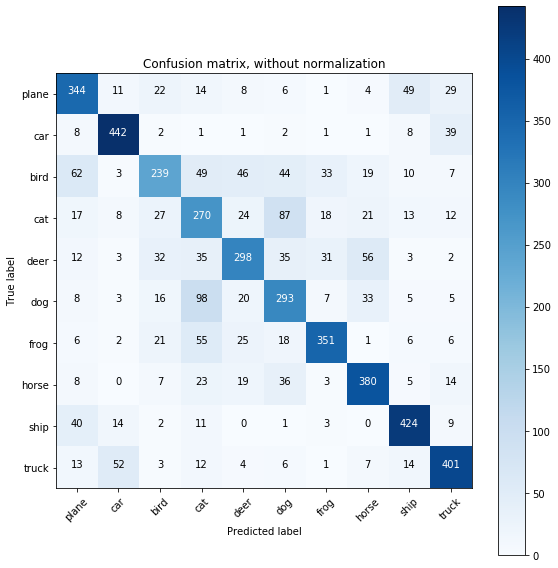

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

### Going further

- [Coursera Course on CNN](https://www.coursera.org/learn/convolutional-neural-networks)
- [Standford Course](http://cs231n.stanford.edu/syllabus.html)
- [PyTorch Tutorial](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)


Note: This tutorial is based on the [original pytorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and was adapted by [Antonin Raffin](http://araffin.github.io/) for the ROB313 course at ENSTA